In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc #한글지원
import platform
import seaborn as sns
plt.rc("font",family='Malgun Gothic') #한글_글꼴
plt.rcParams['axes.unicode_minus'] = False #음수표시
import warnings
warnings.filterwarnings('ignore')

In [54]:
file_dir = 'C:\\edu_busan_202305\\08_미니프로젝트_2차(분석+WEB)\\03_일일_진행현황_제출\\plot'

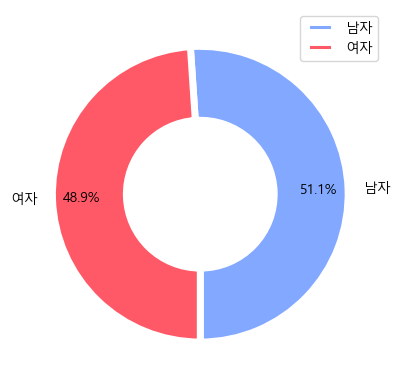

In [10]:
# pivot-table
df_h_p = pd.read_csv(file_dir + '/pie_sex.csv', encoding='euc-kr')

# pie plot
label = df_h_p['성별코드'].value_counts().index
color = ['#82A8FF', '#FF5967']
wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df_h_p['시도코드'], labels=label, pctdistance=0.8, colors=color,
       autopct='%.1f%%', startangle=270, wedgeprops=wedgeprops)
plt.legend(label)

Text(0.5, 1.0, '연령대 별 인원')

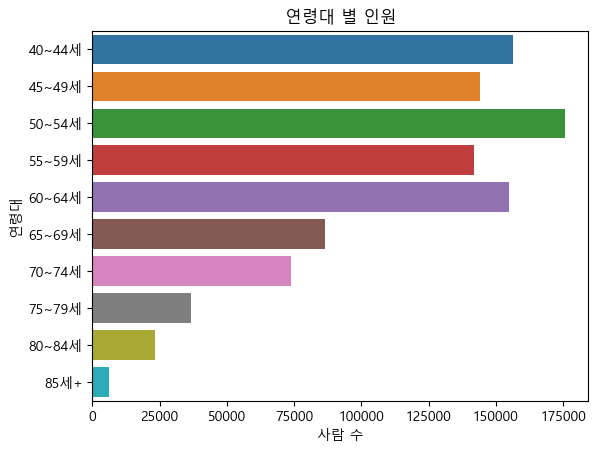

In [23]:
# bar plot
df_h_p = pd.read_csv(file_dir + '/age.csv', encoding='euc-kr')
p = sns.barplot(data = df_h_p, y=list(df_h_p['연령대 코드(5세단위)'].values) , x = list(df_h_p['시도코드'].values))
p.set_xlabel("사람 수")
p.set_ylabel('연령대')
plt.title('연령대 별 인원')

Text(0.5, 1.0, '시도 별 인원')

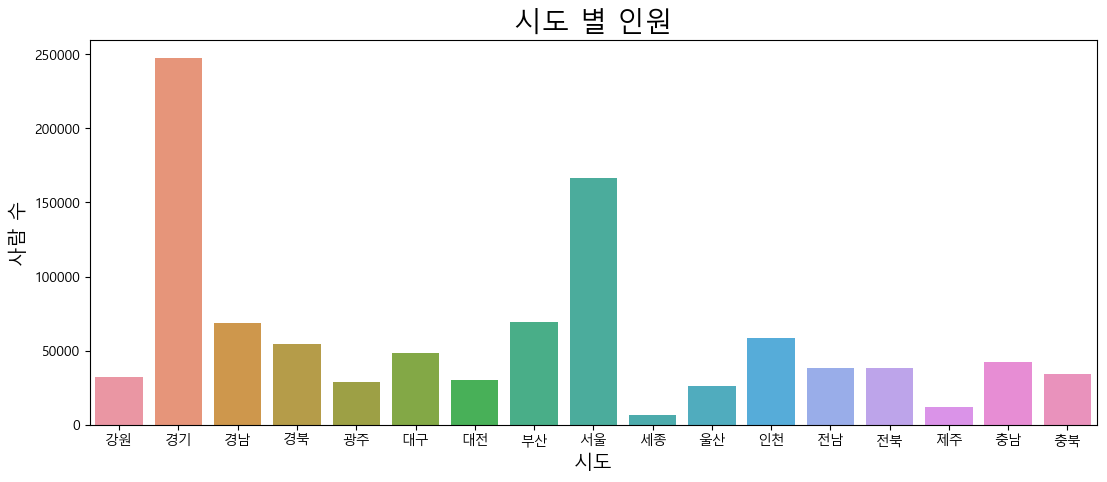

In [24]:
df_h_p = pd.read_csv(file_dir + '/area.csv', encoding='euc-kr')

# bar plot
plt.figure(figsize=(13, 5))

p = sns.barplot(data = df_h_p, x = list(df_h_p['시도코드'].values), y = list(df_h_p['성별코드'].values))

p.set_xlabel("시도", fontsize=14)
p.set_ylabel('사람 수', fontsize=14)
plt.title('시도 별 인원', fontsize=20)

연령별로 선그래프, 제목, x, y축 라벨 붙이기

In [2]:
file_dir = '../data/건강검진/'

In [9]:
df_h_p

,성별코드,신장(5Cm단위)
0,1,165
1,2,150
2,2,155
3,1,160
4,2,155
...,...,...
999995,2,145
999996,2,160
999997,1,175
999998,2,160


In [23]:
df_h_p = pd.read_csv(file_dir + '건강검진_2020.CSV', encoding='euc-kr')
df_h_p = df_h_p.iloc[:, [3,5]]
df_h_p_m = df_h_p[df_h_p['성별코드'] == 2]
df_h_p_m = pd.pivot_table(index='신장(5Cm단위)', values='신장(5Cm단위)', data=df_h_p_m, aggfunc='count')
df_h_p_m.to_csv('hight_m.csv', encoding='euc-kr')

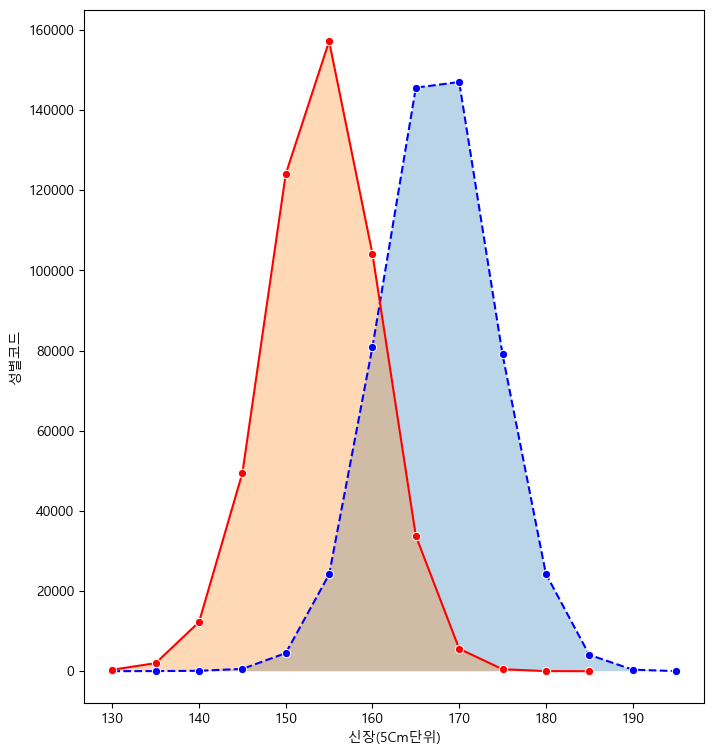

In [28]:
df_h_p = pd.read_csv('hight.csv')

# line plot
plt.figure(figsize=(8, 9))

sns.lineplot(data = df_h_p, x='신장(5Cm단위)', y='성별코드', 
             color='b', # 색상
             linestyle='--', # 라인 스타일
             marker='o') # 마커
x = list(df_h_p['신장(5Cm단위)'])
y = list(df_h_p['성별코드'])
plt.fill_between(x[0:], y[0:], alpha=0.3)

df_h_p_m = pd.read_csv('hight_m.csv', encoding='euc-kr')
sns.lineplot(data = df_h_p_m, x='신장(5Cm단위)', y='성별코드', 
             color='r', # 색상
             linestyle='-', # 라인 스타일
             marker='o') # 마커
x = list(df_h_p_m['신장(5Cm단위)'])
y = list(df_h_p_m['성별코드'])
plt.fill_between(x[0:], y[0:], alpha=0.3)

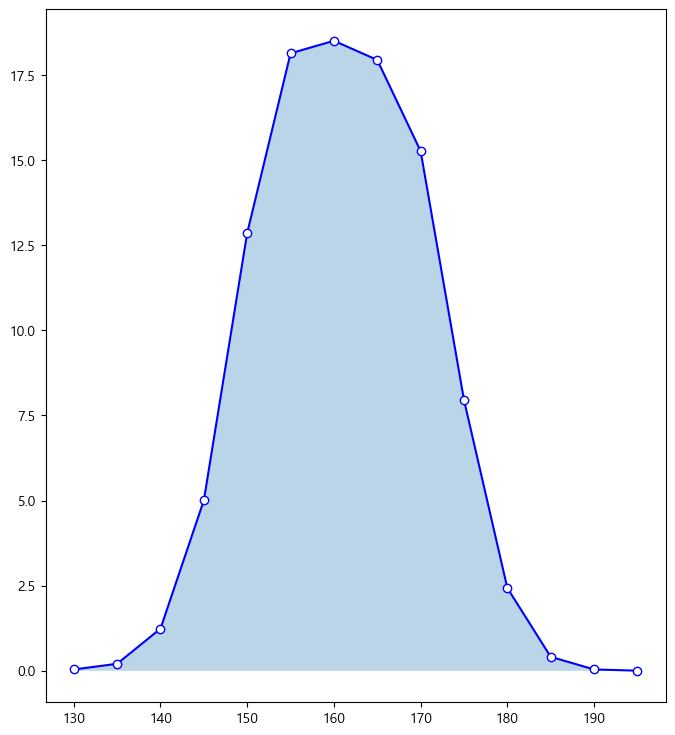

In [46]:
# df_h_p = pd.read_csv(file_dir + '/hight.csv', encoding='euc-kr')
df_h_p = pd.read_csv(file_dir + '건강검진_2020.CSV', encoding='euc-kr')
df_h_p = df_h_p.set_index('신장(5Cm단위)')

# line plot
plt.figure(figsize=(8, 9))

plt.plot(df_h_p['백분위'], color='b', hue='', marker='.', linestyle='solid',
         markersize=12, markerfacecolor='white')

x = list(df_h_p['백분위'].index)
y = list(df_h_p['백분위'])
plt.fill_between(x[0:], y[0:], alpha=0.3)

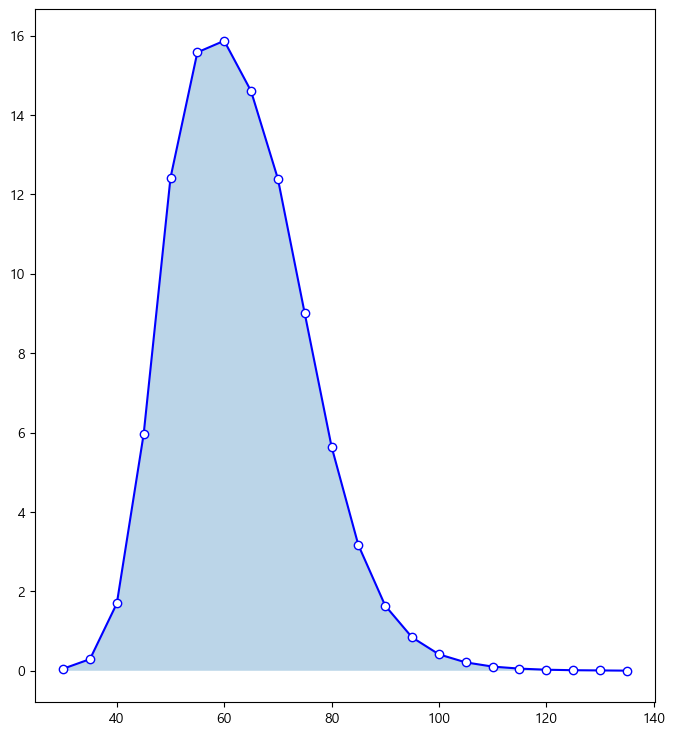

In [52]:
df_h_p = pd.read_csv(file_dir + '/weight.csv', encoding='euc-kr')
df_h_p = df_h_p.set_index('체중(5Kg 단위)')

# line plot
plt.figure(figsize=(8, 9))

plt.plot(df_h_p['백분위'], color='b', marker='.', linestyle='solid',
         markersize=12, markerfacecolor='white')

x = list(df_h_p['백분위'].index)
y = list(df_h_p['백분위'].values)
plt.fill_between(x[0:-1], y[0:-1], alpha=0.3)

---------

In [55]:
df = pd.read_csv(file_dir + '/건강검진.csv', encoding='euc-kr')

In [57]:
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석'],
      dtype='object')

In [60]:
df_p = df[['연령대 코드(5세단위)','시력(좌)', '시력(우)']]

<Axes: xlabel='시력(우)', ylabel='시력(좌)'>

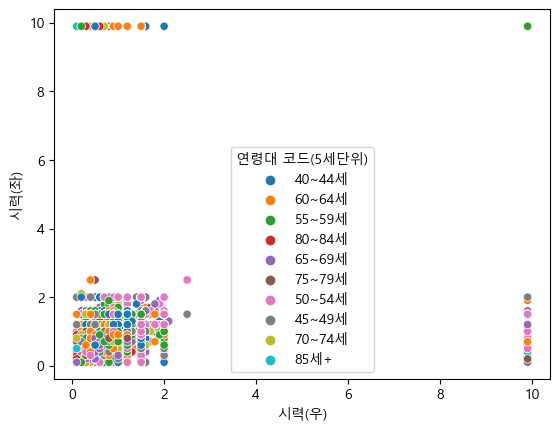

In [61]:
sns.scatterplot(data = df_p, x = '시력(우)', y = '시력(좌)', hue='연령대 코드(5세단위)')